# Trabajo semanal N°4

### Obtención de la plantilla pasabanda normalizada

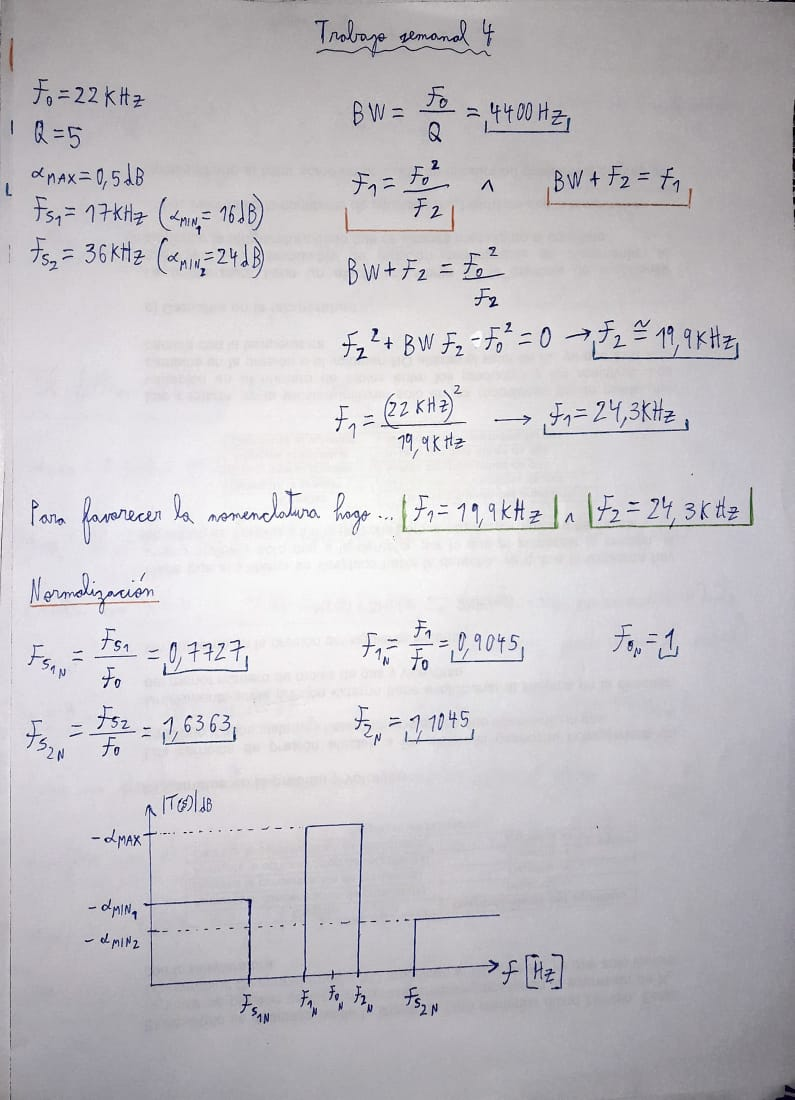



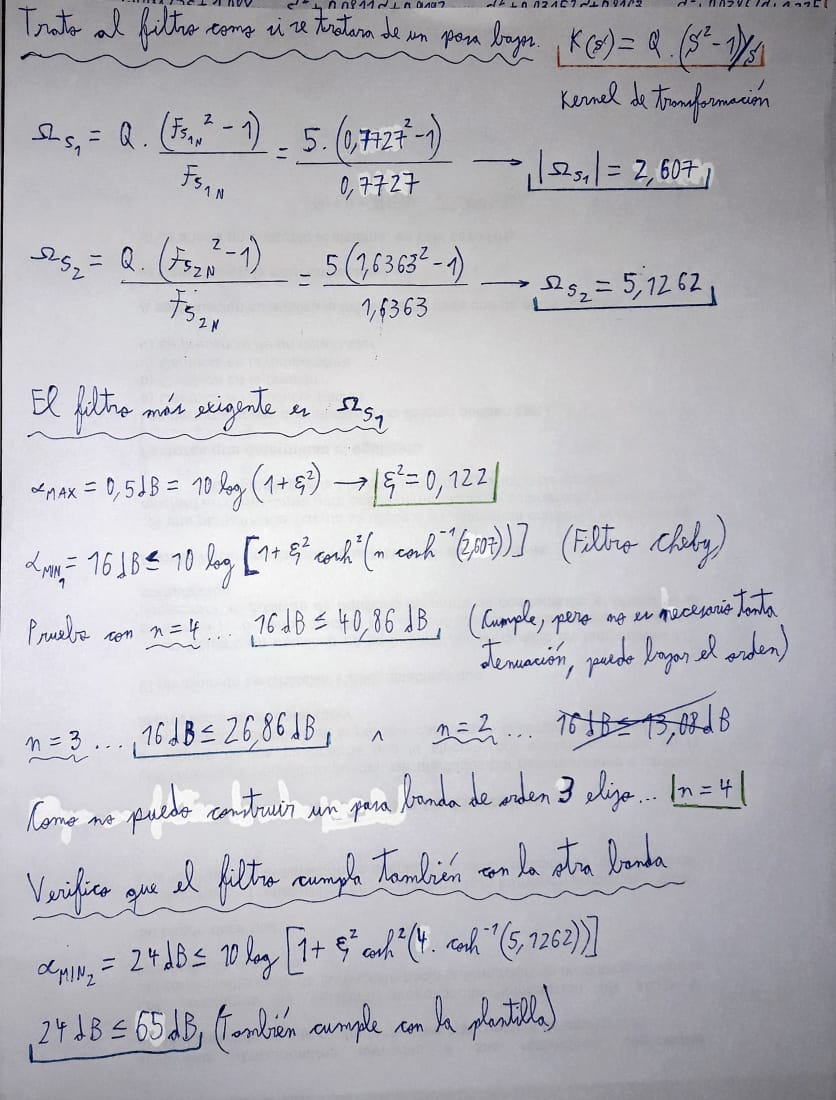

### Obtención de la función transferencia normalizada del prototipo pasabajos

De los cálculos hechos en papel se había llegado a n=4 y $\varepsilon^2 = 0,122$

Haciendo uso de la herramienta del módulo 'splane' en Python se obtiene la función transferencia pasabajos:

In [2]:
import scipy.signal as sig
import splane as tc2

alfa_max = 0.5
nn = 4

z,p,k = sig.cheb1ap(nn, alfa_max)
num_cheb, den_cheb = sig.zpk2tf(z,p,k)

tc2.pretty_print_lti(num_cheb, den_cheb)

<IPython.core.display.Math object>

Ahora se particiona la función transferencia en dos sistemas de segundo orden:

In [3]:
sos_pb = tc2.tf2sos_analog(num_cheb, den_cheb)

tc2.pretty_print_SOS(sos_pb)

<IPython.core.display.Math object>

### Obtención de la función transferencia pasabanda

Con el núcleo de transformación $K_{(s)}=\frac{Q(s^2-1)}{s}$ se consigue la función transferencia del filtro pasabanda: 

In [4]:
Q = 5

num_pbanda, den_pbanda = sig.lp2bp(num_cheb, den_cheb, bw = 1/Q)

tc2.pretty_print_lti(num_pbanda, den_pbanda)

<IPython.core.display.Math object>

Y finalmente se lo particiona en sistemas de segundo orden:

In [5]:
sos_pbanda = tc2.tf2sos_analog(num_pbanda, den_pbanda)
tc2.pretty_print_SOS(sos_pbanda)

<IPython.core.display.Math object>

### Implementación mediante secciones pasivas

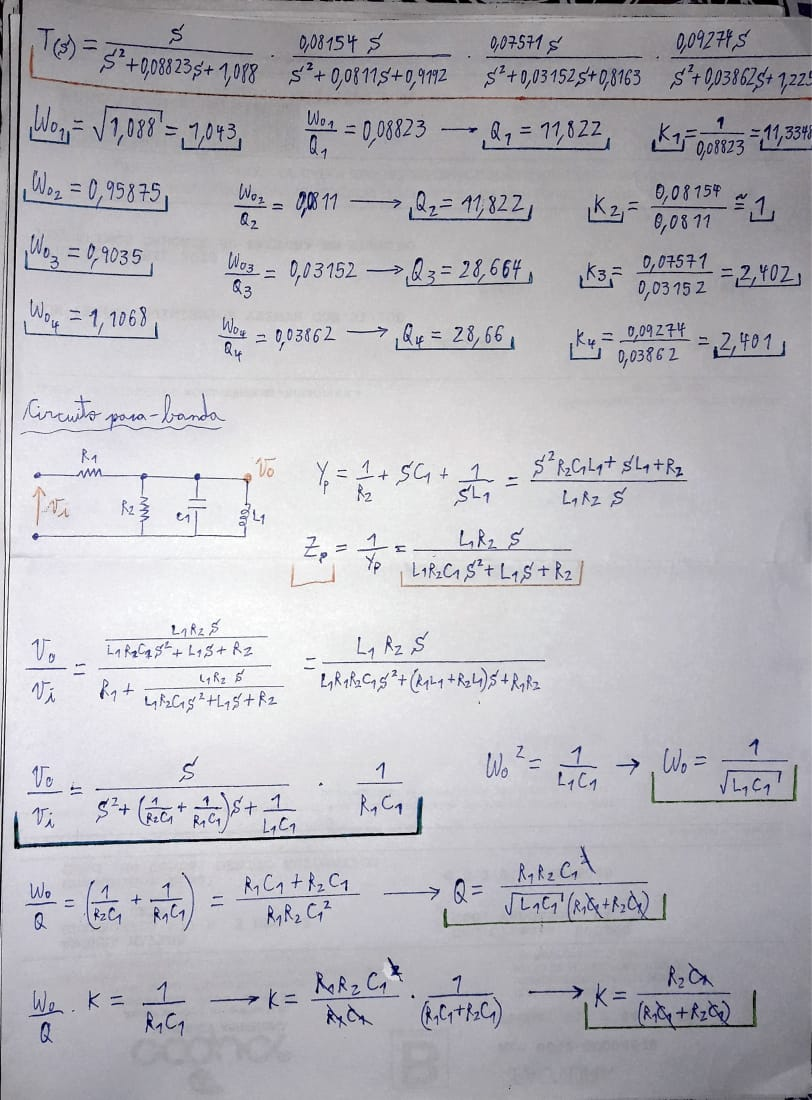


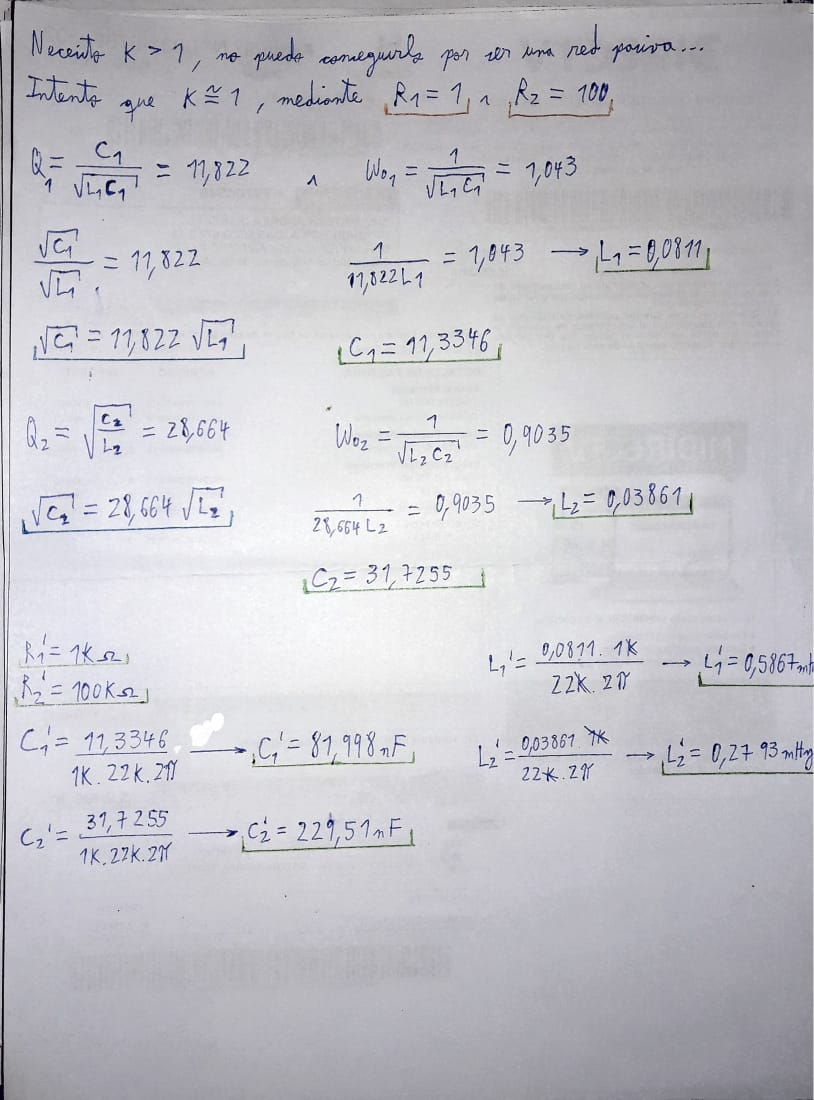


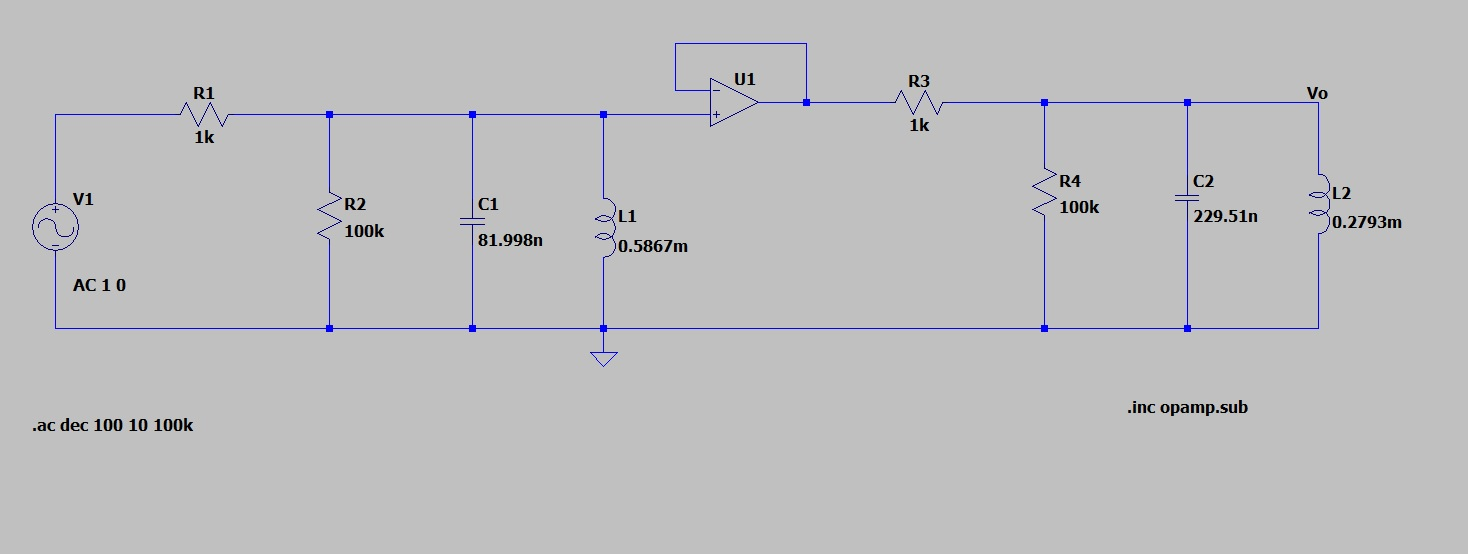


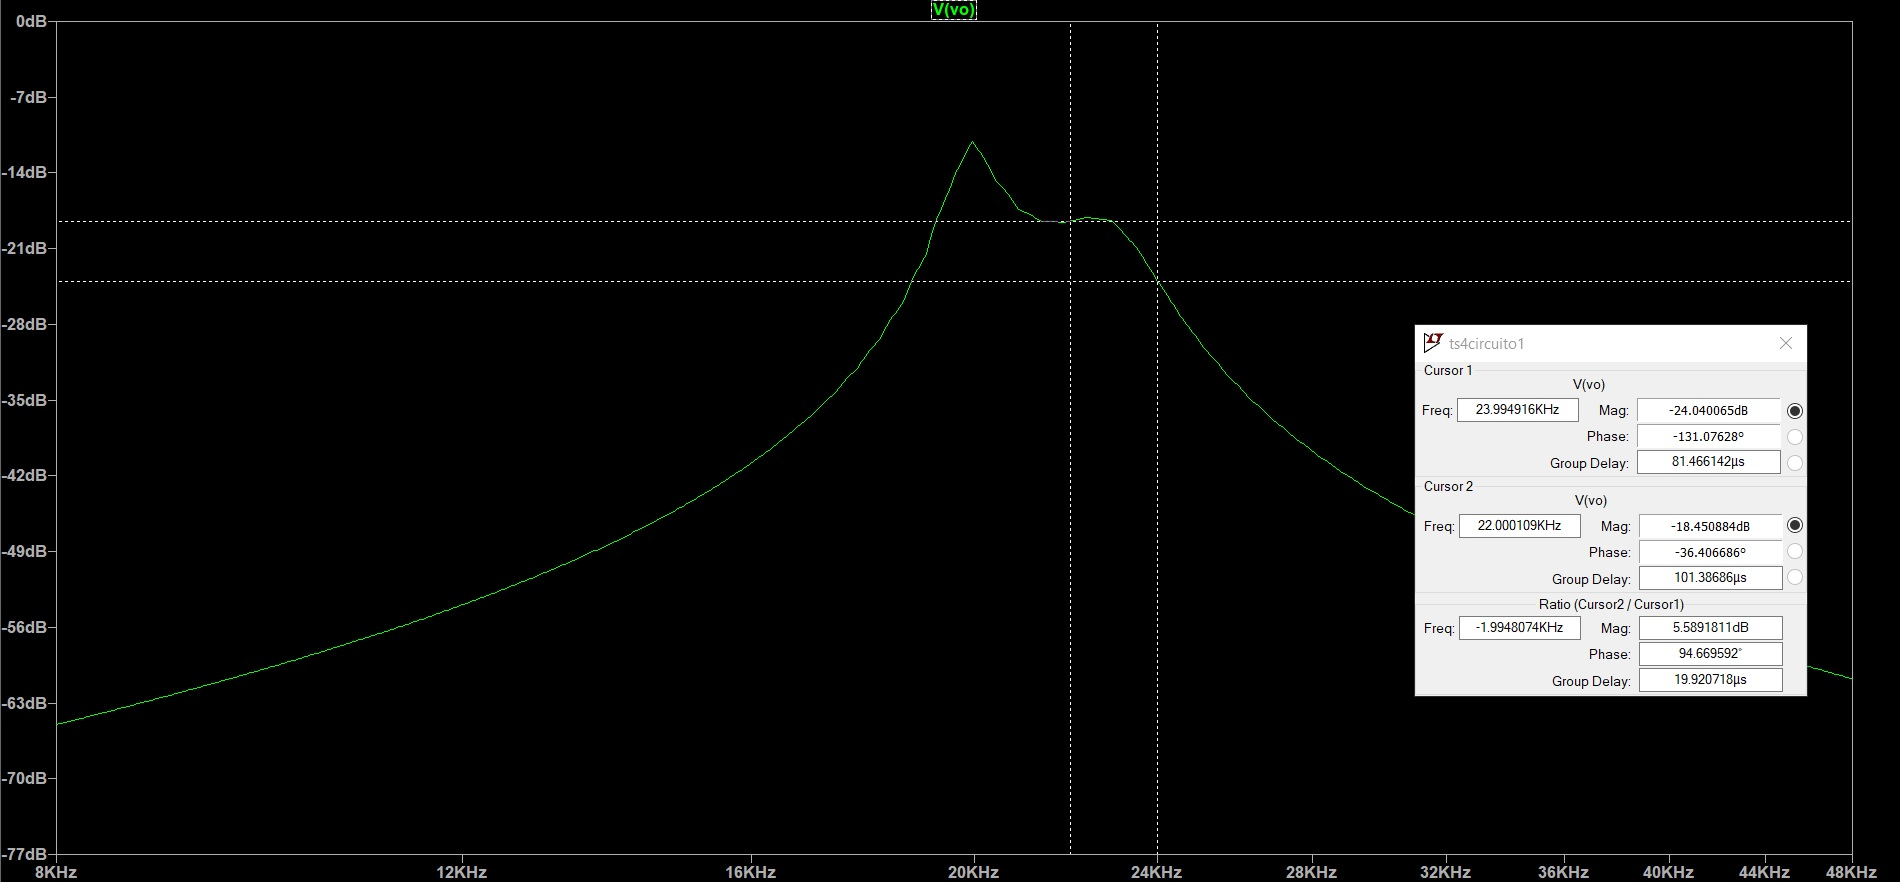

En $ f_o = 22kHz $ se tiene una caída de $ 18.45dB $, por lo tanto la atenuación máxima en banda de paso debe ser la caída relativa entre el centro de la banda de paso y los extremos de la banda de paso, en $ f_1 = 19.9kHz (11.4dB) $ se tiene una ganancia relativa con respecto a $f_o$ por lo tanto cumple con la plantilla, $f_2 = 24.3kHz$ tiene una caída absoluta de $24.04dB$ lo que representa una caída relativa de $5.6dB$, en este caso, por un motivo que desconozco, no cumple con la plantilla.

En cuanto al análisis en las bandas de stop, en $f_{s_1} = 17kHz $ se tiene una caída relativa de 18dB y en $f_{s_2} = 36kHz$, 34dB, en ambos casos se cumple con la condición solicitada.

### Activación de las redes pasivas

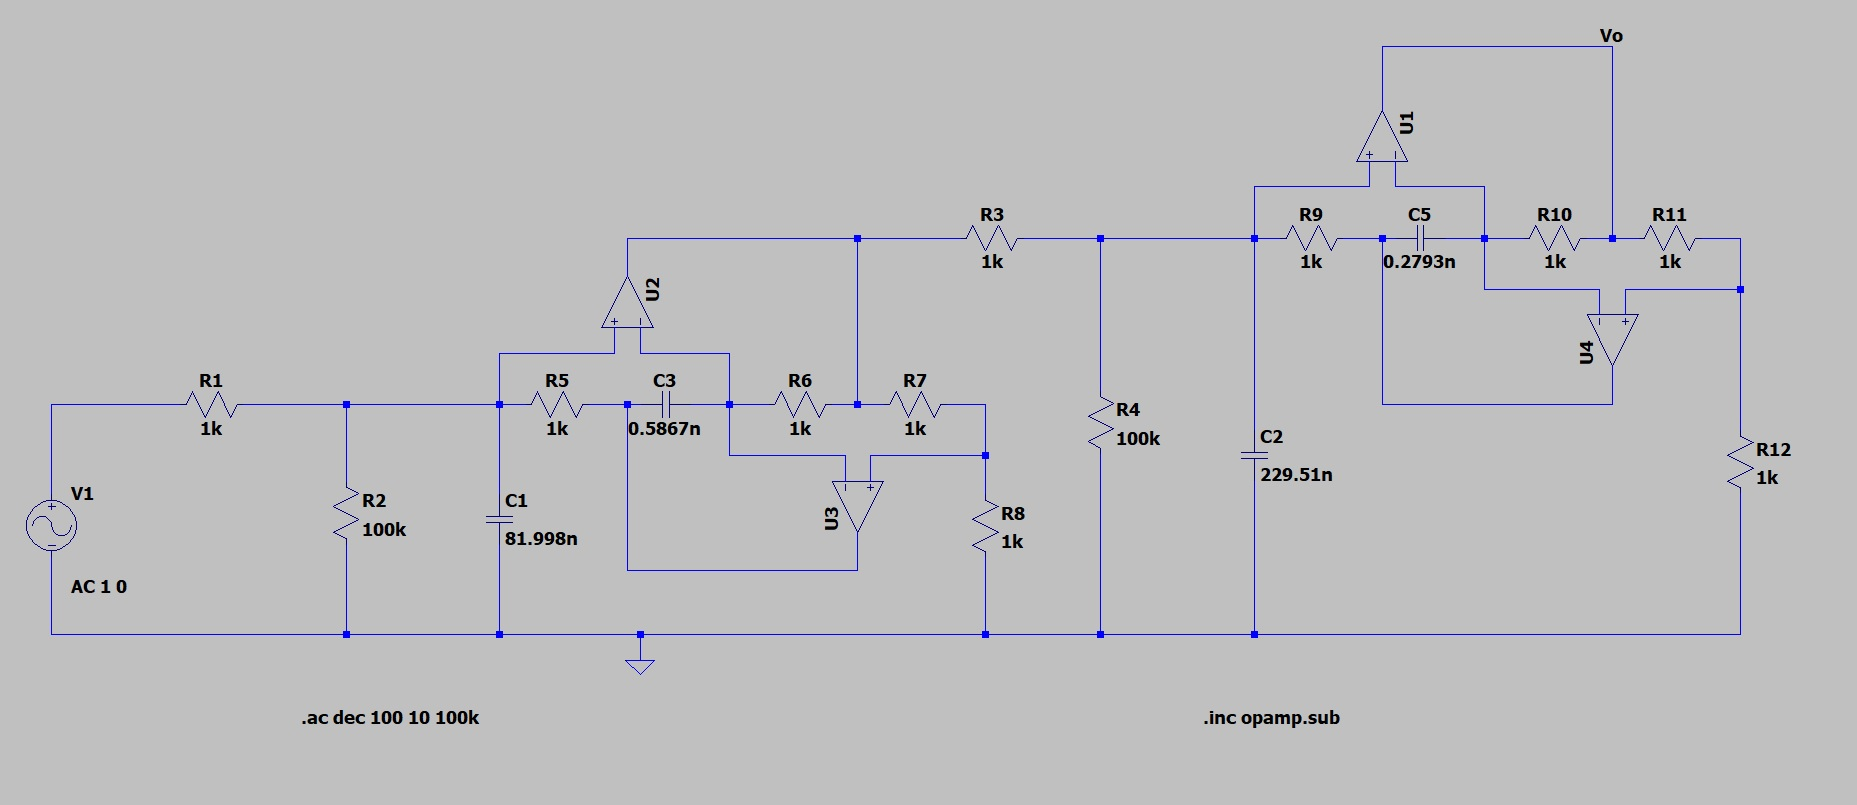

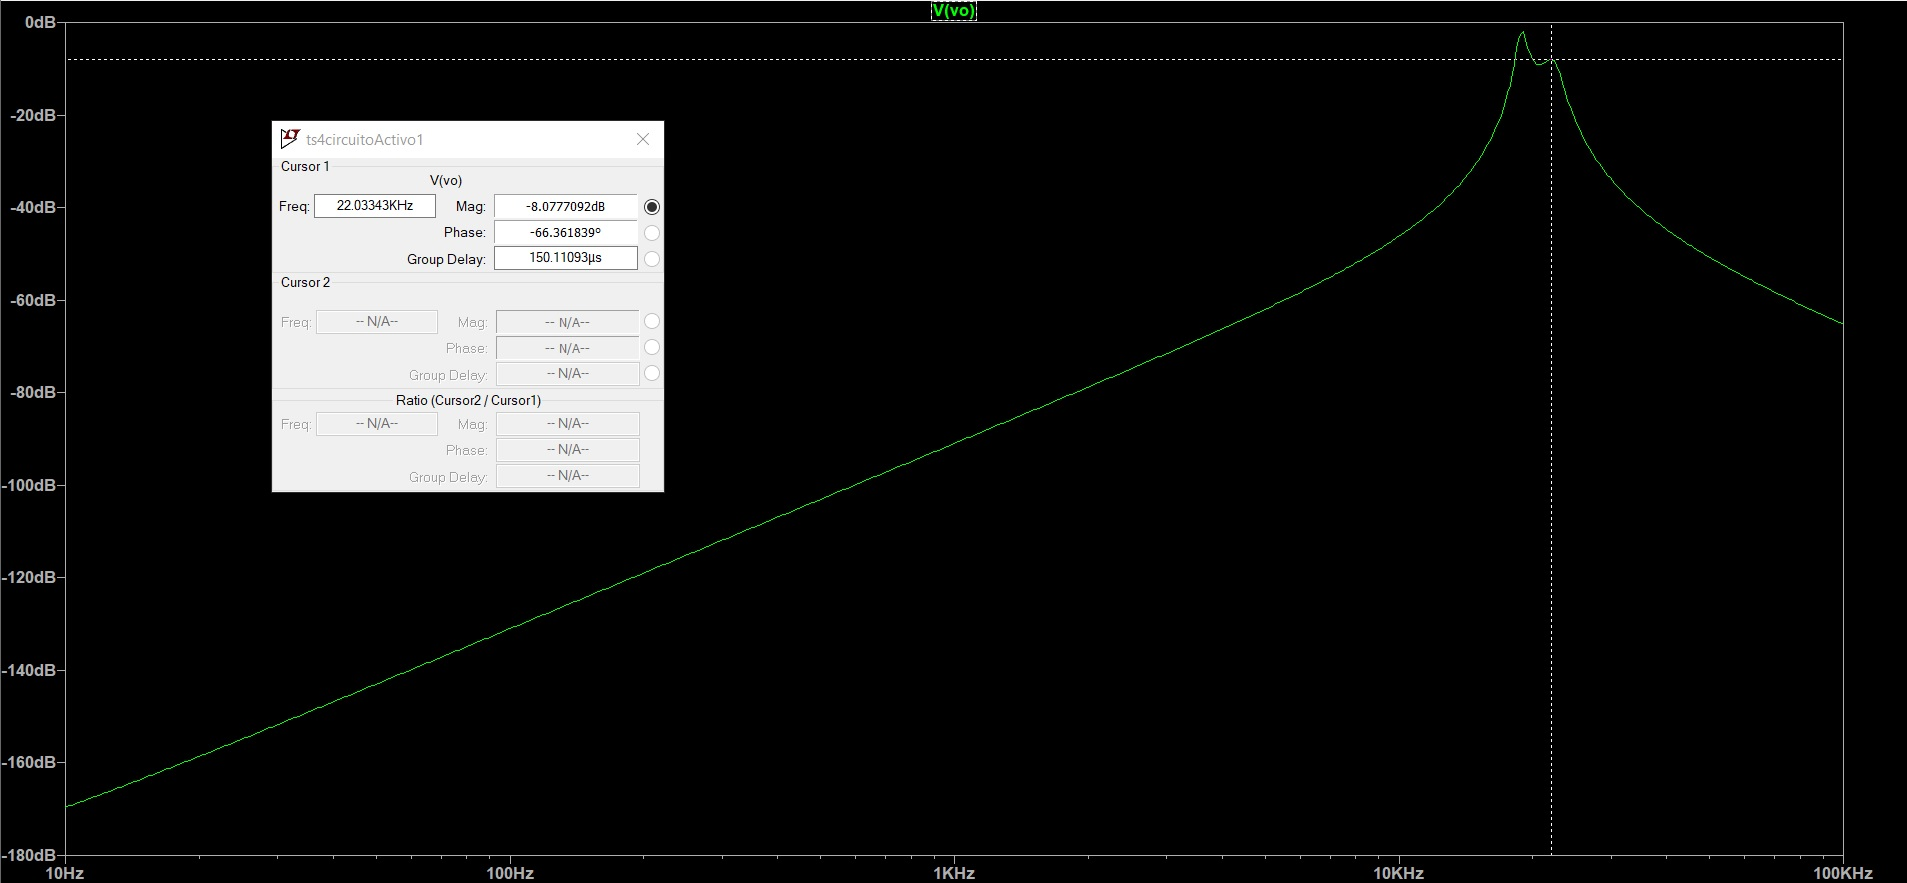

Activando el circuito se puede observar a simple vista que cambia el valor de referencia ya que cada etapa GIC gana el doble en tensión, en $ f_o = 22kHz $ hay una caída de $ \sim 8dB $, asimismo se obtienen los valores de $ f_1 = 19.9 kHz (7.67 dB) \wedge f_2 = 24.3 kHz (18.22 dB) $. Nuevamente el valor de la frecuencia $ f_2 $ no cumple con el valor de $ \alpha_{MAX} $ solicitado. $f_{s_2}$ tiene una caída relativa de 33.3dB y $f_{s_1}$ de 11dB. En este caso la condición de $f_{s_1}$ no se cumple. Pareciera que el valor de $f_o $ no está correctamente centrado. Una posible solución sería modificar los valores desplazando la gráfica hacia la izquierda para centrarlo correctamente.